Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/05 05:25:47 WARN Utils: Your hostname, Aaryans-MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.5 instead (on interface en0)
25/11/05 05:25:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/05 05:25:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+----------+------------------+
|      Date|         Adj Close|
+----------+------------------+
|2014-01-02|17.273225784301758|
|2014-01-03|16.893808364868164|
|2014-01-06|16.985925674438477|
|2014-01-07|16.864458084106445|
|2014-01-08|16.971254348754883|
|2014-01-09| 16.75452995300293|
|2014-01-10|16.642730712890625|
|2014-01-13|16.729862213134766|
|2014-01-14|  17.0627498626709|
|2014-01-15|17.405324935913086|
+----------+------------------+
only showing top 10 rows


25/11/05 05:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+----------+------------------+--------------------+
|      Date|         Adj Close|             log_ret|
+----------+------------------+--------------------+
|2014-01-03|16.893808364868164|-0.02221047428523...|
|2014-01-06|16.985925674438477|0.005437913796058128|
|2014-01-07|16.864458084106445|-0.00717676423148414|
|2014-01-08|16.971254348754883|0.006312656753391122|
|2014-01-09| 16.75452995300293|-0.01285232551195...|
+----------+------------------+--------------------+
only showing top 5 rows


25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


0.0009576396295966164 0.0178852244635548


25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
25/11/05 05:25:55 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+------+------------------+
|sim_id|final_price       |
+------+------------------+
|0     |309.8860880991279 |
|1     |300.9139644332225 |
|2     |302.28344243621234|
|3     |319.4130723072664 |
|4     |301.2696174232138 |
+------+------------------+
only showing top 5 rows


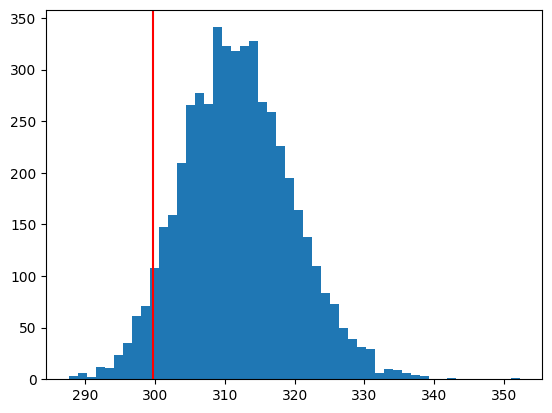

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62989)
Traceback (most recent call last):
  File "/Users/aryanbuilds/.pyenv/versions/3.11.13/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/aryanbuilds/.pyenv/versions/3.11.13/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/Users/aryanbuilds/.pyenv/versions/3.11.13/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/aryanbuilds/.pyenv/versions/3.11.13/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/Users/aryanbuilds/.pyenv/versions/bda-spark/lib/python3.11/site-packages/pyspark/accumulators.py", line 299, in handle
    poll(accum_updates)
  File "/Users/aryanbuilds/.pyenv/versions/bda-spark/lib/python3.11/s

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, stddev, log, lag, udf, element_at
from pyspark.sql.window import Window
from pyspark.sql.types import DoubleType, ArrayType
import math
import numpy as np
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName('Endsems').getOrCreate()
sc = spark.sparkContext

df = spark.read.csv('./StockPriceDataset.csv', header=True, inferSchema=True).where(col('Ticker') == 'AAPL').drop('Low', 'High', 'Open', 'Close', 'Volume', 'Ticker')
df.orderBy('Date').show(10)

w = Window.orderBy(col('Date'))
df_ret = df.withColumn('log_ret', log(col('Adj Close') / lag(col('Adj Close')).over(w))).dropna()
df_ret.show(5)

row = df_ret.select(
  mean(col('log_ret')).alias('mu'),
  stddev(col('log_ret')).alias('sigma')
).collect()[0]

mu, sigma = row
print(mu, sigma)

days = 252
s0 = df_ret.select('Date', 'Adj Close').orderBy(col('Date').desc()).first()['Adj Close']

def monte_carlo(sim_id):
  dt = 1/252
  path = [s0]
  for _ in range(days):
    z = np.random.normal(0,1)
    drift = mu - 0.5 * sigma ** 2
    diffusion = sigma * z * math.sqrt(dt) * z
    val = path[-1] * math.exp(drift+diffusion)
    path.append(val)
  return path

sim_udf = udf(monte_carlo, ArrayType(DoubleType()))
sim_d = spark.range(0, 5000).toDF('sim_id').withColumn(
  'sim_price_path', sim_udf(col('sim_id'))
).withColumn(
  'final_price', element_at(col('sim_price_path'), -1)
)
sim_d.select('sim_id', 'final_price').show(5, truncate=False)

final_prices = sim_d.select('final_price').orderBy(col('final_price')).toPandas().values
var_95 = np.percentile(final_prices, 5)

plt.hist(final_prices, bins=50)
plt.axvline(var_95, color='r')
plt.show()

Average Project Completion Time: 19.66 days
95th Percentile Completion Time: 23.37 days


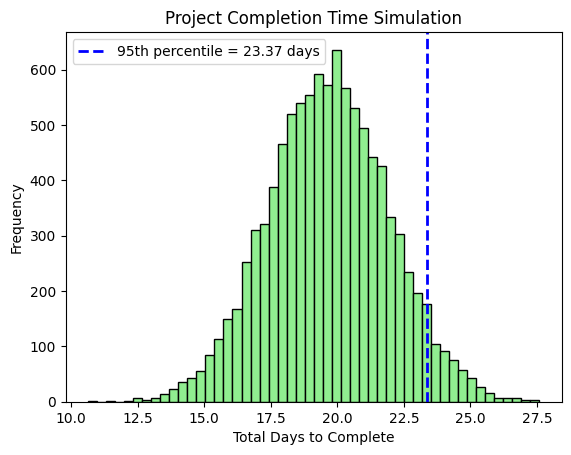

In [2]:
import numpy as np

def simulate_project_time():
    time_task_A = np.random.uniform(3, 5)
    time_task_B = np.random.normal(10, 2)
    time_task_C = np.random.triangular(4, 5, 8) 

    total_time = time_task_A + time_task_B + time_task_C
    return total_time

num_simulations = 10000
project_times = [simulate_project_time() for _ in range(num_simulations)]

avg_completion_time = np.mean(project_times)
p95 = np.percentile(project_times, 95) 

print(f"Average Project Completion Time: {avg_completion_time:.2f} days")
print(f"95th Percentile Completion Time: {p95:.2f} days")

plt.hist(project_times, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(p95, color='blue', linestyle='dashed', linewidth=2, label=f'95th percentile = {p95:.2f} days')
plt.title("Project Completion Time Simulation")
plt.xlabel("Total Days to Complete")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [2]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.pipeline import Pipeline

df_no_head = spark.read.csv('./lab/covtype.data', header=False, inferSchema=True)

columns= [
    "Elevation", "Aspect", "Slope","Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"," Horizontal_Distance_To_Fire_Points",
    *[f"Wilderness_Area{i+1}" for i in range(4)],
    *[f"Soil_Type{i+1}" for i in range(40)],
    "Cover_Type"
]

df = df_no_head.toDF(*columns).withColumn('Cover_Type', col('Cover_Type').cast(DoubleType()))
df.show(5)

train, test = df.randomSplit([0.9, 0.1])

feature_cols = columns[:-1]
va = VectorAssembler(
  inputCols=feature_cols,
  outputCol='features'
)

dtc = DecisionTreeClassifier(
  labelCol='Cover_Type',
  featuresCol='features',
  maxDepth=15
)

pipeline = Pipeline(stages=[va, dtc])

mce = MulticlassClassificationEvaluator(
    labelCol='Cover_Type',
    predictionCol='prediction',
    metricName='accuracy'
)

pgrid = ParamGridBuilder() \
    .addGrid( dtc.maxDepth, [10, 15, 20]) \
    .addGrid( dtc.minInstancesPerNode, [1, 4, 5]) \
    .addGrid( dtc.impurity, ['gini', 'entropy']) \
    .build()

tvs = TrainValidationSplit(
  estimator=pipeline,
  estimatorParamMaps=pgrid,
  evaluator=mce,
  trainRatio=0.8
)

tvs_model = tvs.fit(train)
predictions = tvs_model.transform(test)
accuracy = mce.evaluate(predictions)
print(f"Test Accuracy: {accuracy}")

cf = predictions.orderBy('Cover_Type').groupBy('Cover_Type').pivot('prediction').count().fillna(0).orderBy('Cover_Type')
cf.show()

25/11/05 05:26:02 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+-----------------------------------+----------------+----------------+----------------+----------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm| Horizontal_Distance_To_Fire_Points|Wilderness_Area1|Wilderness_Area2|Wilderness_Area3|

25/11/05 05:26:35 WARN DAGScheduler: Broadcasting large task binary with size 1046.8 KiB
25/11/05 05:26:35 WARN DAGScheduler: Broadcasting large task binary with size 1452.6 KiB
25/11/05 05:26:36 WARN DAGScheduler: Broadcasting large task binary with size 1965.6 KiB
25/11/05 05:26:37 WARN DAGScheduler: Broadcasting large task binary with size 1528.9 KiB
25/11/05 05:26:40 WARN DAGScheduler: Broadcasting large task binary with size 1048.0 KiB
25/11/05 05:26:41 WARN DAGScheduler: Broadcasting large task binary with size 1470.6 KiB
25/11/05 05:26:42 WARN DAGScheduler: Broadcasting large task binary with size 2014.3 KiB
25/11/05 05:26:43 WARN DAGScheduler: Broadcasting large task binary with size 1550.3 KiB
25/11/05 05:26:46 WARN DAGScheduler: Broadcasting large task binary with size 1011.4 KiB
25/11/05 05:26:47 WARN DAGScheduler: Broadcasting large task binary with size 1376.4 KiB
25/11/05 05:26:47 WARN DAGScheduler: Broadcasting large task binary with size 1828.6 KiB
25/11/05 05:26:48 WAR

[112.176s][warning][gc,alloc] Executor task launch worker for task 3.0 in stage 570.0 (TID 5126): Retried waiting for GCLocker too often allocating 3737 words


25/11/05 05:27:38 ERROR SparkUncaughtExceptionHandler: Uncaught exception in thread Thread[Executor task launch worker for task 3.0 in stage 570.0 (TID 5126),5,main]
java.lang.OutOfMemoryError: Java heap space
	at java.base/java.lang.reflect.Array.newInstance(Array.java:78)
	at java.base/java.io.ObjectInputStream.readArray(ObjectInputStream.java:2121)
	at java.base/java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1721)
	at java.base/java.io.ObjectInputStream$FieldValues.<init>(ObjectInputStream.java:2606)
	at java.base/java.io.ObjectInputStream.readSerialData(ObjectInputStream.java:2457)
	at java.base/java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2257)
	at java.base/java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1733)
	at java.base/java.io.ObjectInputStream.readObject(ObjectInputStream.java:509)
	at java.base/java.io.ObjectInputStream.readObject(ObjectInputStream.java:467)
	at org.apache.spark.serializer.JavaDeserializationStream.readObje

ConnectionRefusedError: [Errno 61] Connection refused

ConnectionRefusedError: [Errno 61] Connection refused

Training K-Means model...


25/11/05 04:27:21 WARN MemoryStore: Not enough space to cache rdd_1884_3 in memory! (computed 28.7 MiB so far)
25/11/05 04:27:21 WARN BlockManager: Persisting block rdd_1884_3 to disk instead.
25/11/05 04:27:23 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Training complete.
Transforming test data and identifying anomalies...

--- Anomaly Detection Results ---


+--------+-------+------------------+----------+
|   label|cluster|distance_to_center|is_anomaly|
+--------+-------+------------------+----------+
|ipsweep.|     35|4.3933216406868745|         0|
|   nmap.|     35| 13.18234134027591|         0|
|ipsweep.|     35| 3.603210694698033|         0|
|ipsweep.|     35| 3.603210694698033|         0|
|ipsweep.|     35| 3.603210694698033|         0|
|ipsweep.|     35| 3.603210694698033|         0|
|ipsweep.|     35| 3.603210694698033|         0|
|ipsweep.|     35| 3.603210694698033|         0|
|ipsweep.|     35| 3.601145097443509|         0|
|ipsweep.|     35| 3.603149350198137|         0|
+--------+-------+------------------+----------+
only showing top 10 rows

Breakdown of detected anomalies by true label:


+------------+-----+
|       label|count|
+------------+-----+
|     normal.|  451|
|      smurf.|  162|
|    neptune.|  148|
|       back.|  136|
|        pod.|   47|
|      satan.|   31|
|  portsweep.|   26|
|   teardrop.|   13|
|    ipsweep.|   11|
|warezclient.|    6|
|       nmap.|    2|
| loadmodule.|    2|
|   multihop.|    1|
+------------+-----+




Total points in test set: 147599
Total points flagged as anomalies: 1036 (0.70%)


DataFrame[duration: int, protocol_type: string, service: string, flag: string, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, label: string]

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler, OneHotEncoder
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.functions import *
from pyspark.sql.types import *
import numpy as np

cols = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

raw_df = spark.read.csv('./lab/kddcup.data_10_percent_corrected.csv', header=False, inferSchema=True).toDF(*cols)

train_df, test_df = raw_df.randomSplit([0.8, 0.2])
train_df.cache(); test_df.cache()

categorical_cols = ["protocol_type", "service", "flag"]
numerical_cols = [c for c in cols if c not in categorical_cols + ['label']]

sis = [StringIndexer(inputCol=c, outputCol=f'{c}_ind', handleInvalid='keep') for c in categorical_cols]
ohes = [OneHotEncoder(inputCol=f'{c}_ind', outputCol=f'{c}_vec') for c in categorical_cols]
ohe_cols = [f"{c}_vec" for c in categorical_cols]

va = VectorAssembler(inputCols=ohe_cols + numerical_cols, outputCol='features')
ss = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

kmeans = KMeans(featuresCol='scaled_features', predictionCol='cluster', k=110)
pipeline = Pipeline(stages=sis+ohes+[va,ss,kmeans])

kmeans_model = pipeline.fit(train_df)
cluster_centers = kmeans_model.stages[-1].clusterCenters()

kmeans_test = kmeans_model.transform(test_df)
kmeans_test.show(5)
print(cluster_centers)

def euc_dist(features_vec, cluster_id):
  center_vec = cluster_centers[cluster_id]
  return float(np.linalg.norm(np.array(features_vec) - np.array(center_vec)))

euc_udf = udf(euc_dist, DoubleType())

kmeans_test_dist = kmeans_test.withColumn(
  'distance', 
  euc_dist(col('scaled_features'), col('cluster'))
)

dist_stats = kmeans_test_dist.groupBy('cluster').agg(
  mean('distance').alias('mean_distance'),
  stddev('distance').alias('stddev_distance')
)
kmeans_test_stats = kmeans_test_dist.join(dist_stats, on='cluster')

threshold_factor = 3
anomalies_df = kmeans_test_stats.withColumn(
  'is_anomaly', 
  col('distance') > col('mean_distance') + threshold_factor * col('stddev_distance')
).cast('integer')

anomalies_df.filter(col('is_anomaly') == 1).groupBy('label').count().orderBy(col('count').desc()).show()

total_detected = anomalies_df.filter(col('is_anomaly') == 1).count()
total_test = anomalies_df.count()
print(f"\nTotal points in test set: {total_test}")
print(f"Total points flagged as anomalies: {total_detected} ({100 * total_detected / total_test:.2f}%)")


25/11/05 05:06:07 WARN MemoryStore: Not enough space to cache rdd_2359_0 in memory! (computed 29.4 MiB so far)
25/11/05 05:06:07 WARN BlockManager: Persisting block rdd_2359_0 to disk instead.
25/11/05 05:06:07 WARN MemoryStore: Not enough space to cache rdd_2359_1 in memory! (computed 29.4 MiB so far)
25/11/05 05:06:07 WARN BlockManager: Persisting block rdd_2359_1 to disk instead.


+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+--------+-----------------+-----------+--------+-----------------+--------------+--------------+--------------------+--------------------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_